In [1]:
import ROOT as R
from array import array

signals = ["MHc-70_MA-15", "MHc-100_MA-60", "MHc-130_MA-90", "MHc-160_MA-155"]
backgrounds = ["nonprompt", "conversion", "diboson", "ttX", "others"]

Welcome to JupyROOT 6.28/00


In [2]:
h_signals = {}
h_backgrounds = {}

for i, signal in enumerate(signals):
    f = R.TFile.Open(f"samples/2018/Skim3Mu__DenseNet__/{signal}.root")
    tree = f.Get(f"{signal}_Central")
    h = R.TH1D(signal, "", 200, 0., 200.)
    h.SetDirectory(0)
    for evt in tree: h.Fill(tree.mass, tree.weight)
    h.SetLineColor(i+1)
    h.SetLineWidth(2)
    h.SetStats(0)
    h_signals[signal] = h
    f.Close()
    
for i, background in enumerate(backgrounds):
    f = R.TFile.Open(f"samples/2018/Skim3Mu__DenseNet__/{background}.root")
    tree = f.Get(f"{background}_Central")
    h = R.TH1D(background, "", 200, 0., 200.)
    h.SetDirectory(0)
    for evt in tree: h.Fill(tree.mass, tree.weight)
    h.SetFillColor(i+2)
    h_backgrounds[background] = h
    f.Close()

In [12]:
# make background stack
stack = R.THStack()
for hist in h_backgrounds.values():
    stack.Add(hist)
stack.Draw()

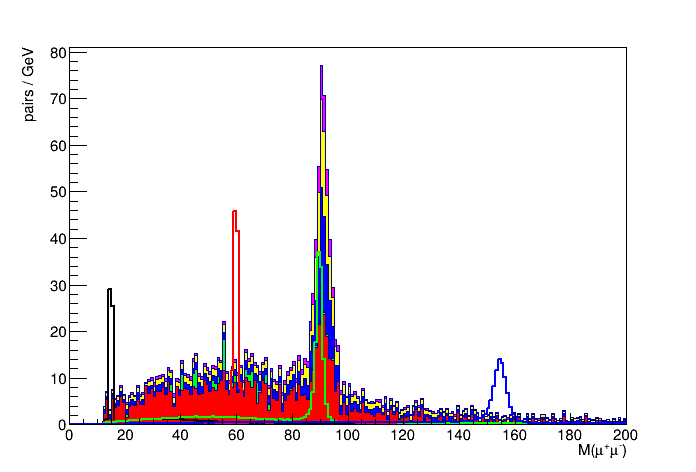

In [17]:
stack.GetHistogram()
stack.GetXaxis().SetTitle("M(#mu^{+}#mu^{-})")
stack.GetYaxis().SetTitle("pairs / GeV")
stack.GetYaxis().SetRangeUser(0, 100)

c = R.TCanvas()
c.cd()
stack.Draw("hist")
for sig in h_signals.values():
    sig.Draw("hist&same")
c.RedrawAxis()
c.Draw()